In [4]:
# Moving charge in magnetic field
# F = q. (v x B)
# if B = (0, 0, b)
# s.t. Fx = q.v_y.b  and Fy = -q.v_x.b

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [133]:
q = 1
m_e = 0.1
b = 50
t0 = 0
tf = 10
dt = 0.01
t = np.arange(t0, tf+dt, dt)
vx_0 = 1
vy_0 = 1
vz_0 = 1

In [134]:
'''
def velocity_propogation(v0, t, a):
    v = np.zeros((len(t)))
    v[0] = v0
    
    for i in range(len(t)-1):
        v[i+1] = v + a*t[i]
        
    return v '''

'\ndef velocity_propogation(v0, t, a):\n    v = np.zeros((len(t)))\n    v[0] = v0\n    \n    for i in range(len(t)-1):\n        v[i+1] = v + a*t[i]\n        \n    return v '

In [135]:
F_x = lambda v_y, v_x: q*v_y*b
F_y = lambda v_x, v_y: -q*v_x*b

In [136]:
def Euler(vx_0, vy_0, t, F_x, F_y):
    v_x = np.zeros(len(t))
    v_y = np.zeros(len(t))
    v_x[0] = vx_0
    v_y[0] = vy_0
    dt = t[1] - t[0]
    
    for i in range(len(t)-1):
        v_x[i+1] = v_x[i] + dt*F_y(v_x[i], v_y[i])
        v_y[i+1] = v_y[i] + dt*F_x(v_y[i], v_x[i])
        
    return v_x, v_y

In [137]:
velocity_x, velocity_y = Euler(vx_0, vy_0, t, F_x, F_y)

In [138]:
velocity_net = ((velocity_x)**2 + (velocity_y)**2)**(0.5)

<ipython-input-138-e90f480ba464>:1: RuntimeWarning: overflow encountered in square
  velocity_net = ((velocity_x)**2 + (velocity_y)**2)**(0.5)


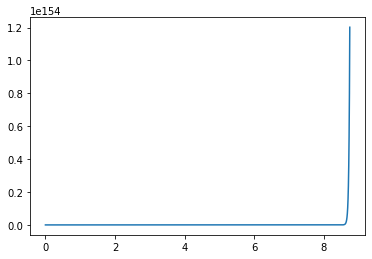

In [139]:
plt.plot(t, velocity_net)

In [140]:
# accelaration_vector
a_x = (q/m_e)*b*velocity_y
a_y = (q/m_e)*b*velocity_x
a_net = ((a_x)**2 + (a_y)**2)**(0.5)

<ipython-input-140-619e0e353899>:4: RuntimeWarning: overflow encountered in square
  a_net = ((a_x)**2 + (a_y)**2)**(0.5)


In [141]:
# position_vector in time 
s = np.zeros(len(t))
s[0] = 1000000000

for i in range(len(t)-1):
    s[i+1] = s[i] + velocity_net[i]*dt

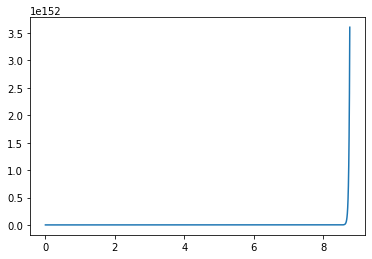

In [143]:
plt.plot(t, s)